# DSC530-T302
# Weeks 7-8 Assignment
# Jacob Siau

## Chapter 5 Exercises 1-4 from Hands-On Data Analysis with Pandas (Molin, 2021)

### Chapter 5 Exercise 1.

Plot the rolling 20-day minimum of the Facebook closing price using pandas.

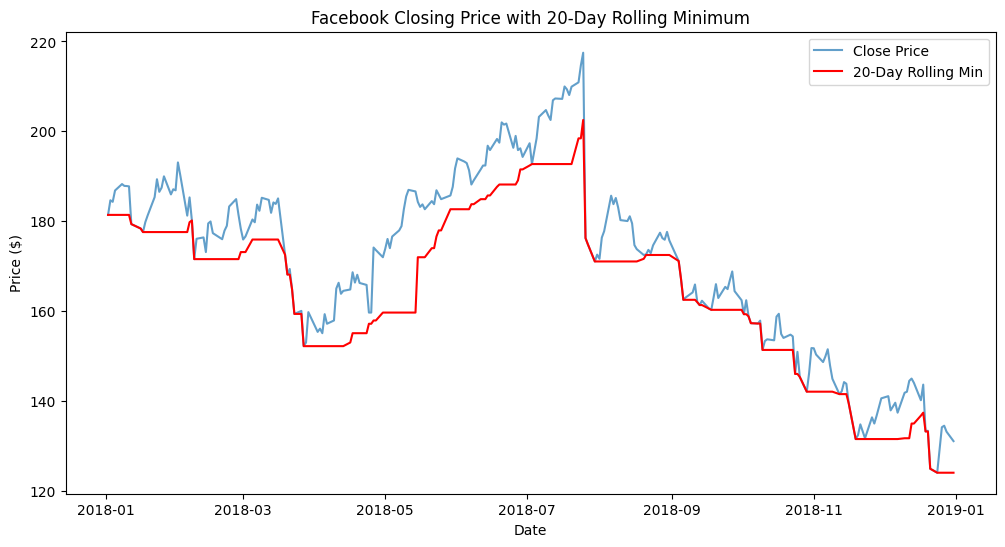

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# load facebook stock price data
fb = pd.read_csv('data/fb_stock_prices_2018.csv', parse_dates=['date'])
fb.set_index('date', inplace=True)

# calculate and plot the rolling 20-day minimum of the closing price
rolling_min = fb['close'].rolling(window='20D').min()

# plot the closing price and the rolling minimum
plt.figure(figsize=(12, 6))
plt.plot(fb['close'], label='Close Price', alpha=0.7)
plt.plot(rolling_min, label='20-Day Rolling Min', color='red')
plt.title('Facebook Closing Price with 20-Day Rolling Minimum')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

### Chapter 5 Exercise 2.
Create a histogram and KDE of the change from open to close in the price of Facebook stock.

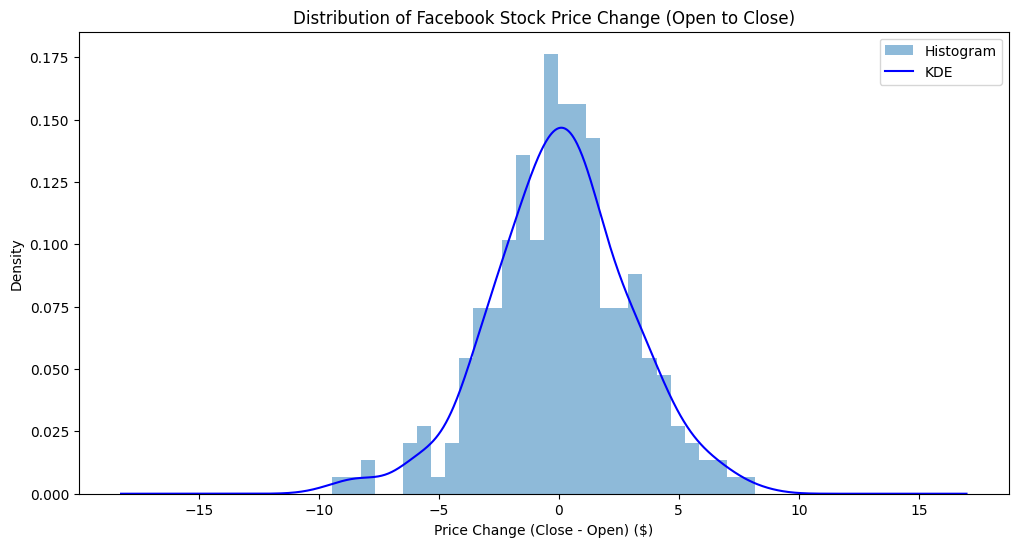

In [43]:
# calculate the change from open to close
price_change = fb['close'] - fb['open']

# create histogram and KDE
fig, ax = plt.subplots(figsize=(12, 6))
price_change.hist(bins=30, density=True, alpha=0.5, label='Histogram', ax=ax)
price_change.plot(kind='kde', color='blue', ax=ax, label='KDE')
ax.set_xlabel('Price Change (Close - Open) ($)')
ax.set_ylabel('Density')
ax.set_title('Distribution of Facebook Stock Price Change (Open to Close)')
ax.legend()
plt.show()

### Chapter 5 Exercise 3.
Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

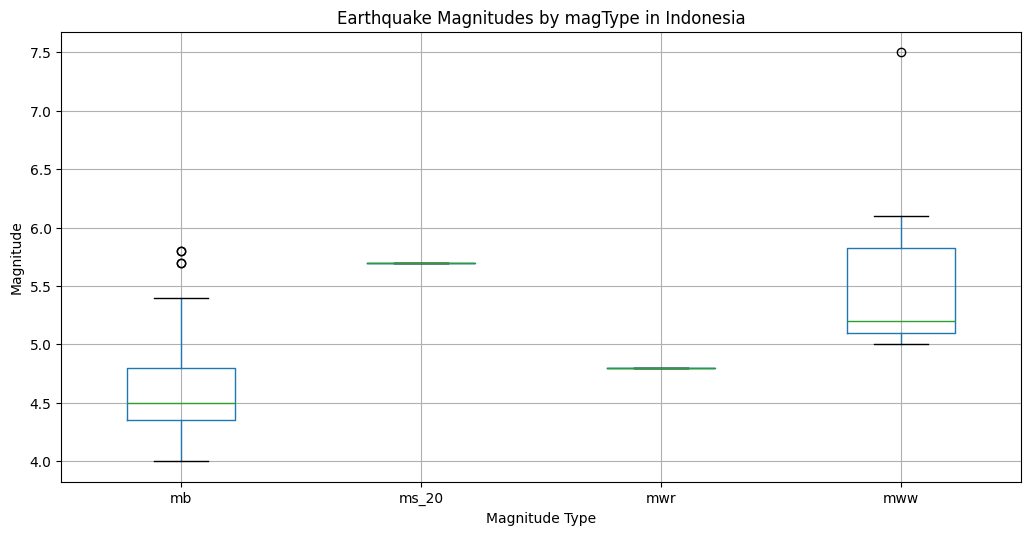

In [44]:
# load earthquake data
earthquakes = pd.read_csv('data/earthquakes.csv')

# filter for Indonesia using parsed_place column
indonesia_eq = earthquakes[earthquakes['parsed_place'] == 'Indonesia']

# create box plots for magnitudes of each magType in Indonesia
fig, ax = plt.subplots(figsize=(12, 6))
indonesia_eq.boxplot(column='mag', by='magType', ax=ax)
ax.set_title('Earthquake Magnitudes by magType in Indonesia')
ax.set_xlabel('Magnitude Type')
ax.set_ylabel('Magnitude')
plt.suptitle('')
plt.show()

### Chapter 5, Exercise 4.
Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line.

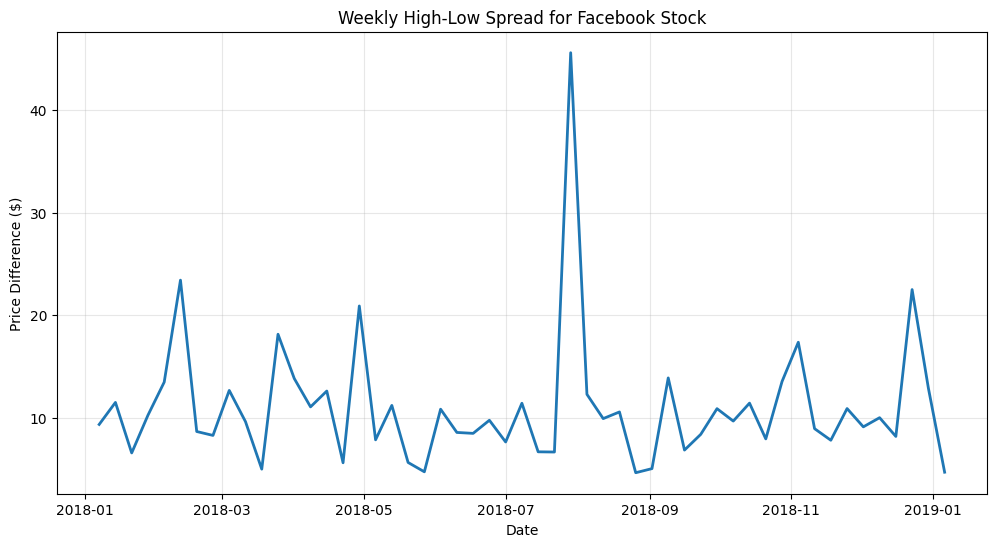

In [45]:
# resample to weekly data and calculate the difference between weekly max high and weekly min low
weekly_diff = fb.resample('W')['high'].max() - fb.resample('W')['low'].min()

# create line plot
plt.figure(figsize=(12, 6))
plt.plot(weekly_diff, linewidth=2)
plt.title('Weekly High-Low Spread for Facebook Stock')
plt.xlabel('Date')
plt.ylabel('Price Difference ($)')
plt.grid(True, alpha=0.3)
plt.show()

## Chapter 6 Exercises 1-2 from Hands-On Data Analysis with Pandas (Molin, 2021)

### Chapter 6 Exercise 1.
Using Seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami for earthquakes measured with the mb magnitude type.

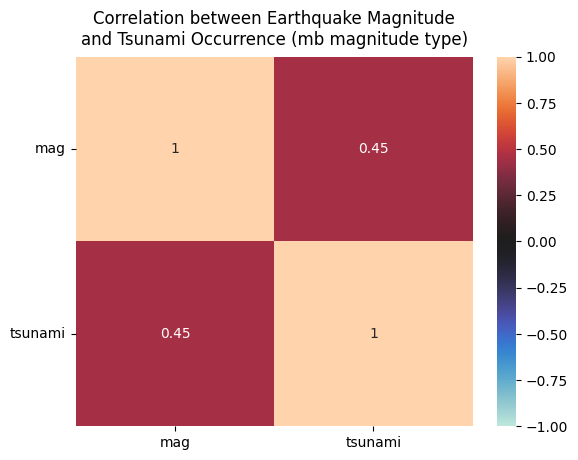

In [46]:
import seaborn as sb

# filter earthquakes for mb magnitude type
mb_earthquakes = earthquakes[earthquakes['magType'] == 'mb']

# calculate correlation between magnitude and tsunami
correlation_matrix = mb_earthquakes[['mag', 'tsunami']].corr()

# create heatmap
sb.heatmap(correlation_matrix, annot=True, center=0, vmin=-1, vmax=1)
plt.yticks(rotation=0)
plt.title('Correlation between Earthquake Magnitude\nand Tsunami Occurrence (mb magnitude type)', y=1.01)
plt.show()

### Chapter 6 Exercise 2. 
Create a box plot of Facebook volume traded and closing prices and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 − 1.5 × IQR and Q3 + 1.5 × IQR. Be sure to use the quantile() method on the data to make this easier. Pick whichever orientation you prefer for the plot, but make sure to use subplots.

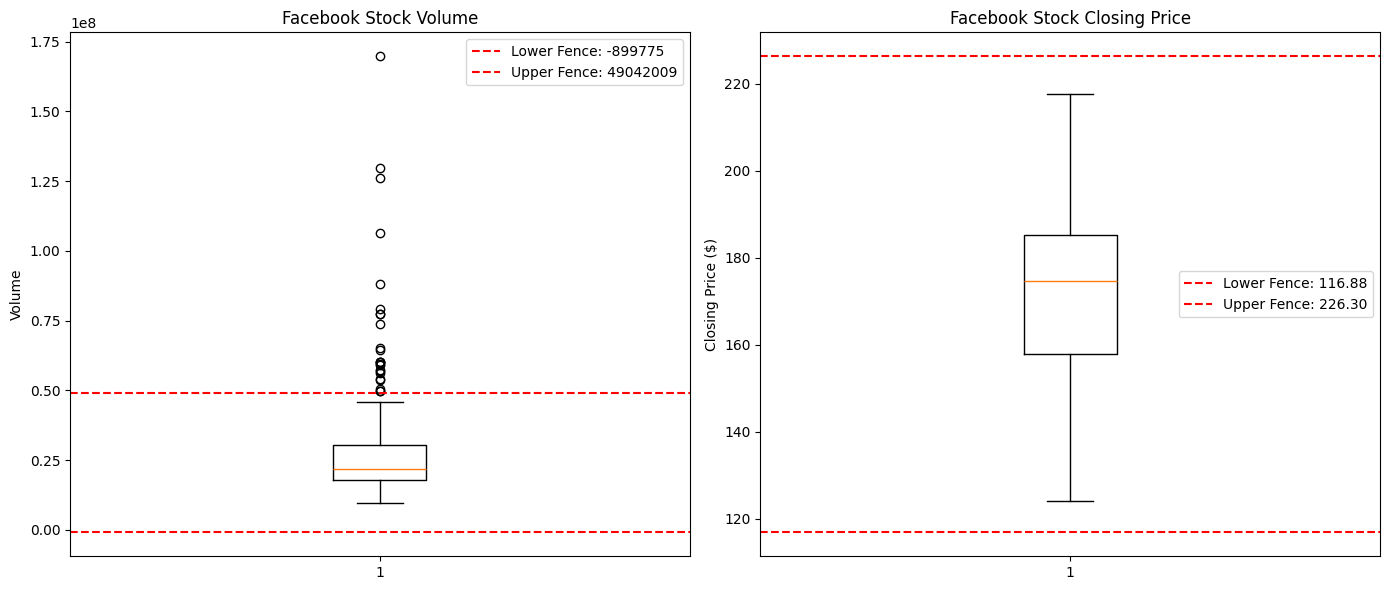

In [47]:
# Calculate quantiles and IQR for volume
volume_q1 = fb['volume'].quantile(0.25)
volume_q3 = fb['volume'].quantile(0.75)
volume_iqr = volume_q3 - volume_q1
volume_lower = volume_q1 - 1.5 * volume_iqr
volume_upper = volume_q3 + 1.5 * volume_iqr

# Calculate quantiles and IQR for close price
close_q1 = fb['close'].quantile(0.25)
close_q3 = fb['close'].quantile(0.75)
close_iqr = close_q3 - close_q1
close_lower = close_q1 - 1.5 * close_iqr
close_upper = close_q3 + 1.5 * close_iqr

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot volume with Tukey fence
axes[0].boxplot(fb['volume'])
axes[0].axhline(volume_lower, color='red', linestyle='--', label=f'Lower Fence: {volume_lower:.0f}')
axes[0].axhline(volume_upper, color='red', linestyle='--', label=f'Upper Fence: {volume_upper:.0f}')
axes[0].set_ylabel('Volume')
axes[0].set_title('Facebook Stock Volume')
axes[0].legend()

# Plot closing price with Tukey fence
axes[1].boxplot(fb['close'])
axes[1].axhline(close_lower, color='red', linestyle='--', label=f'Lower Fence: {close_lower:.2f}')
axes[1].axhline(close_upper, color='red', linestyle='--', label=f'Upper Fence: {close_upper:.2f}')
axes[1].set_ylabel('Closing Price ($)')
axes[1].set_title('Facebook Stock Closing Price')
axes[1].legend()

plt.tight_layout()
plt.show()